# 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

# 2. Loading the Dataset

In [2]:
# 1. Load your dataset
df = pd.read_csv('C:\\Users\\Minusha Attygala\\OneDrive\\Documents\\Final Individual Project\\diabetes.csv')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.shape

(2111, 17)

# 3. Data Preprocessing

In [4]:
# Checking for Missing Values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
# Basic statistical summary
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
# Displaying the types of each column
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [7]:
print(df.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')


### - family_history_with_overweight	- Has a family member suffered or suffers from overweight?		 
### - FAVC - Do you eat high caloric food frequently?	
### - FCVC - Do you usually eat vegetables in your meals?		 
### - NCP - How many main meals do you have daily?		 
### - CAEC - Do you eat any food between meals?	 
### - SMOKE - Do you smoke?	 
### - CH2O - How much water do you drink daily?	 
### - SCC - Do you monitor the calories you eat daily?	 
### - FAF - How often do you have physical activity?		 
### - TUE - How much time do you use technological devices such as cell phone, videogames, television, computer and others?	 
### - CALC - How often do you drink alcohol?	 
### - MTRANS	Feature - Which transportation do you usually use?	
### - NObeyesdad - Obesity level		

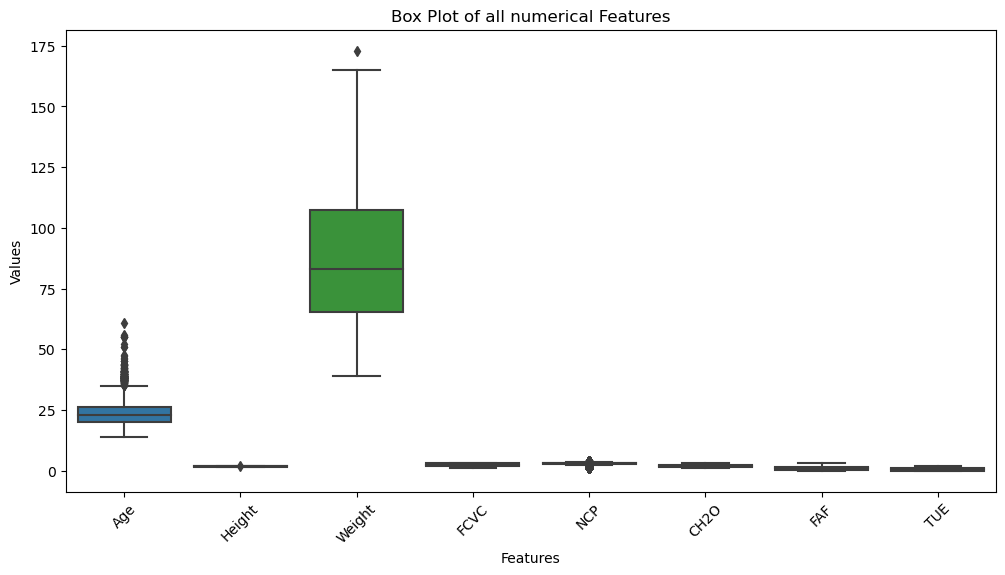

In [8]:
# Create a box plot for all numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title('Box Plot of all numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

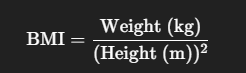

In [9]:
# Calculate BMI
df['bmi'] = df['Weight'] / (df['Height'] ** 2)

In [10]:
# Create BMI Category
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi <= 24.9:
        return 'Normal weight'
    elif 25.0 <= bmi <= 29.9:
        return 'Overweight'
    elif 30.0 <= bmi <= 34.9:
        return 'Obese Class 1'
    elif 35.0 <= bmi <= 39.9:
        return 'Obese Class 2'
    else:
        return 'Morbidly Obese'

df['weight_status'] = df['bmi'].apply(bmi_category)

In [11]:
# Drop original Height and Weight if not needed anymore
df.drop(['Height', 'Weight', 'NObeyesdad'], axis=1, inplace=True)

In [12]:
df[['bmi', 'weight_status']].head()

,bmi,weight_status
0,24.386526,Normal weight
1,24.238227,Normal weight
2,23.765432,Normal weight
3,26.851852,Overweight
4,28.342381,Overweight


In [13]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,bmi,weight_status
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,24.386526,Normal weight
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,24.238227,Normal weight
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,23.765432,Normal weight
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,26.851852,Overweight
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,28.342381,Overweight


In [14]:
df['weight_status'].value_counts()

weight_status
Overweight        562
Obese Class 1     366
Obese Class 2     335
Normal weight     296
Morbidly Obese    281
Underweight       271
Name: count, dtype: int64

| Feature | Why it matters |
|---------|----------------|
| BMI (calculated from Height & Weight) | Strongest predictor. Higher BMI → higher insulin resistance → higher diabetes risk. |
| family_history_with_overweight | Genetics & family history play a major role in predisposition. |
| FAVC (High-calorie food consumption) | Leads to weight gain → increases obesity risk → raises chances of diabetes. |
| FCVC (Vegetable consumption) | Higher veg intake = better glucose regulation, lower risk. |
| NCP (Number of meals) | Irregular or excessive eating patterns can spike insulin demand. |
| CAEC (Eating between meals) | Constant snacking, especially unhealthy, impacts glucose levels. |
| CH2O (Water intake) | Good hydration supports kidney function and may help glucose management. |
| SCC (Monitoring calories) | Shows awareness of diet → generally leads to better weight and glucose control. |
| FAF (Physical activity) | Crucial! Regular activity improves insulin sensitivity. |
| CALC (Alcohol consumption) | Excessive alcohol can lead to pancreatitis or insulin resistance. |
| SMOKE | Smoking increases inflammation and insulin resistance. |
| TUE (Tech time / sedentary behavior) | More screen time = less movement = higher diabetes risk. |
| MTRANS (Mode of transportation) | Passive modes (car, bike) may reflect a sedentary lifestyle. |

In [15]:
# Map Weight Status → Diabetes Risk
def map_diabetes_risk(weight_status):
    mapping = {
        "Underweight": "Low risk",
        "Normal weight": "Lowest risk",
        "Overweight": "Moderate to high risk",
        "Obese Class 1": "High risk",
        "Obese Class 2": "Very high risk",
        "Morbidly Obese": "Extremely high risk"
    }
    return mapping[weight_status]

In [16]:
df['diabetes_risk'] = df['weight_status'].apply(map_diabetes_risk)

In [17]:
df.head()

,Gender,Age,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,bmi,weight_status,diabetes_risk
0,Female,21.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,24.386526,Normal weight,Lowest risk
1,Female,21.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,24.238227,Normal weight,Lowest risk
2,Male,23.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,23.765432,Normal weight,Lowest risk
3,Male,27.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,26.851852,Overweight,Moderate to high risk
4,Male,22.0,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,28.342381,Overweight,Moderate to high risk


### Principal Component Analysis (PCA)

In [18]:
from sklearn.decomposition import PCA # library for PCA
from sklearn.preprocessing import StandardScaler #library to standerize the dats

In [19]:
features = df.select_dtypes(include=[np.number]).columns.tolist() # selecting numerical features for pca
X = df[features]

In [20]:
scaler = StandardScaler() # standardizing / feature scalling the data
X_scaled = scaler.fit_transform(X)

In [21]:
pca = PCA(n_components=2)  # number of components = 2
principal_components = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2']) #DataFrame with the principal components

In [22]:
explained_variance = pca.explained_variance_ratio_ #print Explained variance by each principle component
print(f'Explained variance by each principle component: {explained_variance}')

Explained variance by each principle component: [0.22786032 0.18684521]


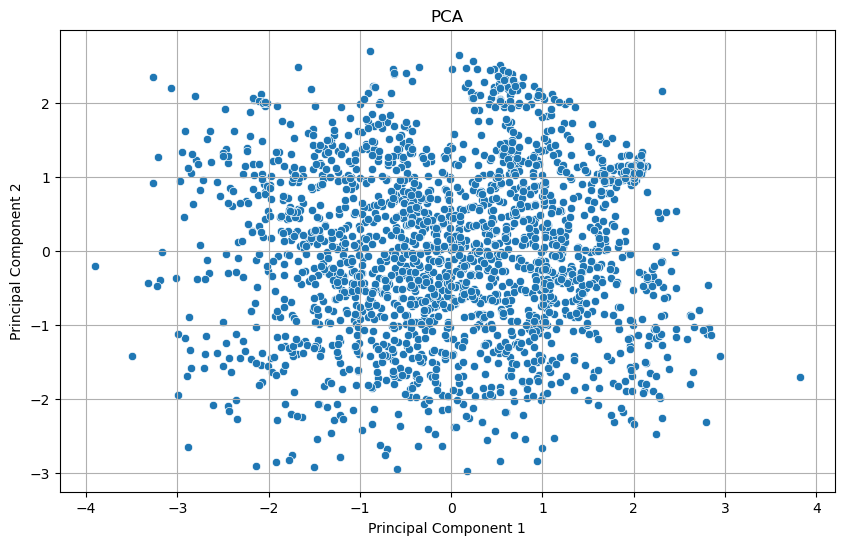

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', data=pca_df)
plt.title('PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [24]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_) #the relationships between the original features and the principal components
loading_df = pd.DataFrame(loadings, index=features, columns=['PC1', 'PC2'])
print(loading_df)

           PC1       PC2
Age   0.682668 -0.182887
FCVC  0.394459  0.496668
NCP  -0.103714  0.478463
CH2O  0.015058  0.657223
FAF  -0.428785  0.497230
TUE  -0.569050  0.080524
bmi   0.674898  0.337369


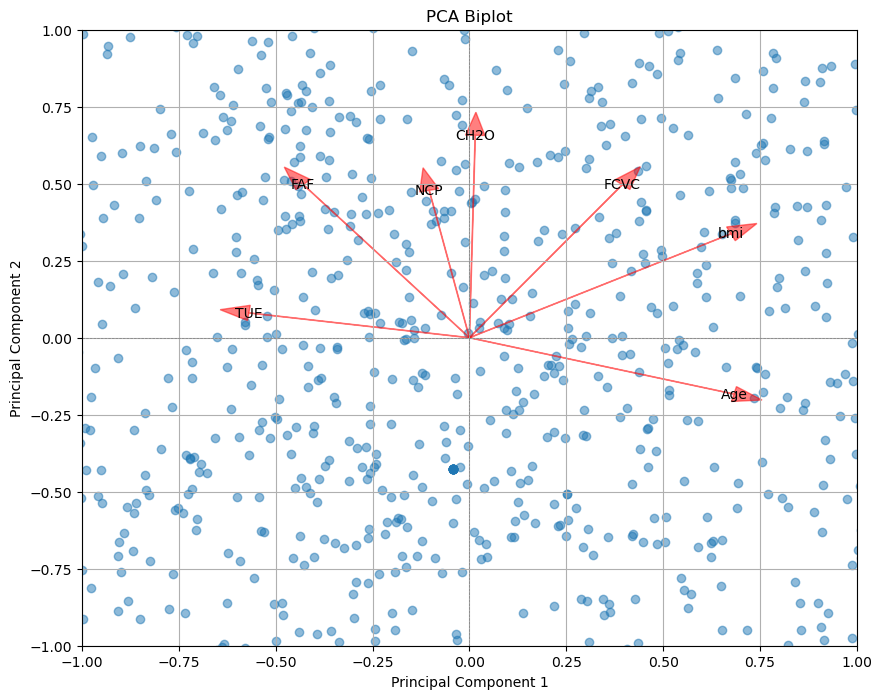

In [25]:
# biplot
plt.figure(figsize=(10, 8))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)

# Add arrows for the loadings
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1],
              color='r', alpha=0.5, head_width=0.05)
    plt.text(loadings[i, 0], loadings[i, 1], feature, color='black', ha='center', va='center')

plt.title('PCA Biplot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.xlim(-1, 1) # change these two the way you want
plt.ylim(-1, 1)
plt.axhline(0, color='grey', lw=0.5, ls='--')
plt.axvline(0, color='grey', lw=0.5, ls='--')
plt.show()

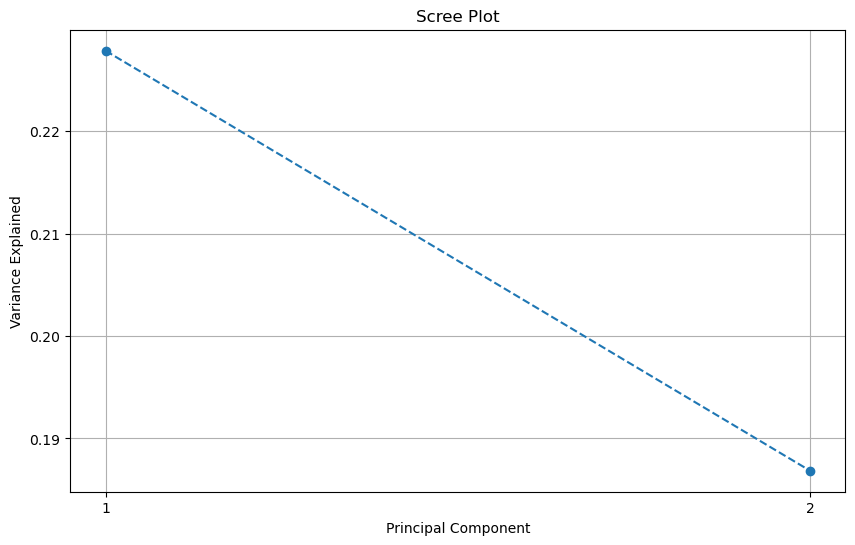

In [26]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(explained_variance) + 1))  # Set x-ticks to be the component numbers
plt.grid()
plt.show()

# Model Building

### Random Forest

In [27]:
from sklearn.ensemble import RandomForestClassifier

In [28]:
#selecting feature/ variables from the dataset for the models

#encoding categorical variables
df['Gender'] = df['Gender'].astype('category').cat.codes
df['family_history_with_overweight'] = df['family_history_with_overweight'].astype('category').cat.codes
df['FAVC'] = df['FAVC'].astype('category').cat.codes
df['CAEC'] = df['CAEC'].astype('category').cat.codes
df['SMOKE'] = df['SMOKE'].astype('category').cat.codes
df['SCC'] = df['SCC'].astype('category').cat.codes
df['CALC'] = df['CALC'].astype('category').cat.codes
df['MTRANS'] = df['MTRANS'].astype('category').cat.codes
df['weight_status'] = df['weight_status'].astype('category').cat.codes

#encoding Target variable
df['diabetes_risk'] = df['diabetes_risk'].astype('category').cat.codes

#features and target variable
features = ['Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'bmi', 'weight_status']
target = ['diabetes_risk']
x = df[features]
y = df[target]

In [29]:
#split the dataser
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [30]:
#Training the model - Random Forest
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(x_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [31]:
y_pred_rf = RF_model.predict(x_test) # Predictions

In [32]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_rf

1.0

In [33]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00       101
           5       1.00      1.00      1.00        60

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



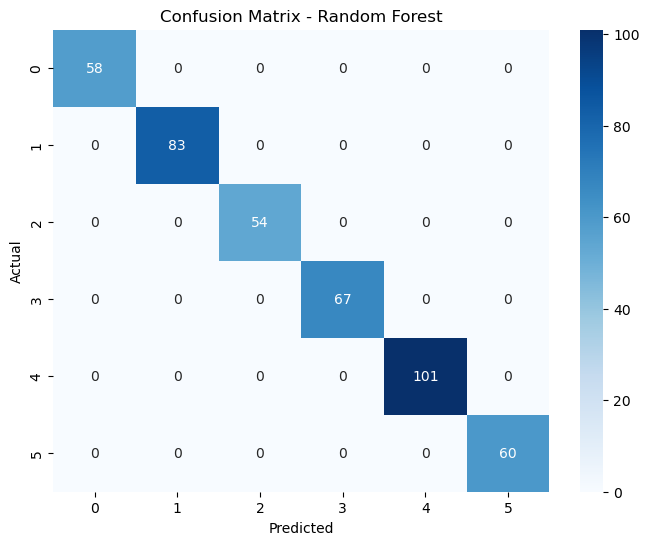

In [34]:
cm_RF = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF, annot=True, fmt='d', cmap='Blues', xticklabels=RF_model.classes_, yticklabels=RF_model.classes_)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### XGBoost

In [35]:
import xgboost as xgb #XGboost library

In [36]:
XG_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
XG_model.fit(x_train, y_train)

D:\anaconda\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:03:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
# Make predictions
y_pred_xg = XG_model.predict(x_test)

In [38]:
accuracy_xg = accuracy_score(y_test, y_pred_xg)
accuracy_xg

1.0

In [39]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00       101
           5       1.00      1.00      1.00        60

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



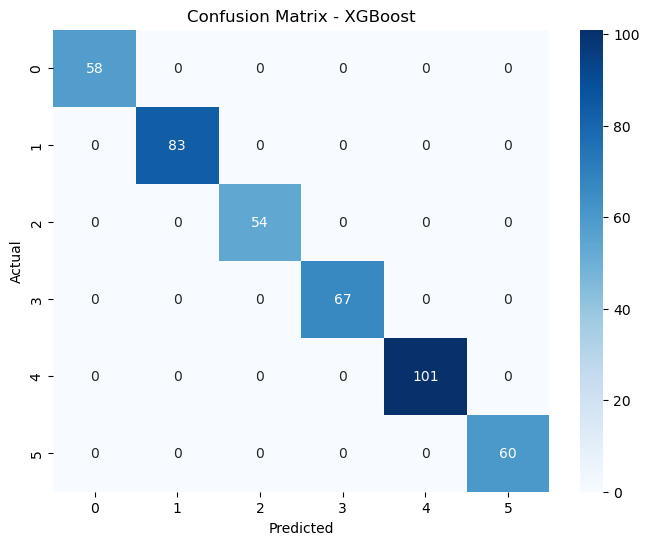

In [40]:
cm_XG = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_XG, annot=True, fmt='d', cmap='Blues', xticklabels=XG_model.classes_, yticklabels=XG_model.classes_)
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [42]:
NB_model = GaussianNB()
NB_model.fit(x_train, y_train)
y_pred_naiveB = NB_model.predict(x_test)

D:\anaconda\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [43]:
accuracy_nb = accuracy_score(y_test, y_pred_naiveB)
accuracy_nb

1.0

In [44]:
print(classification_report(y_test, y_pred_naiveB))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        83
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00       101
           5       1.00      1.00      1.00        60

    accuracy                           1.00       423
   macro avg       1.00      1.00      1.00       423
weighted avg       1.00      1.00      1.00       423



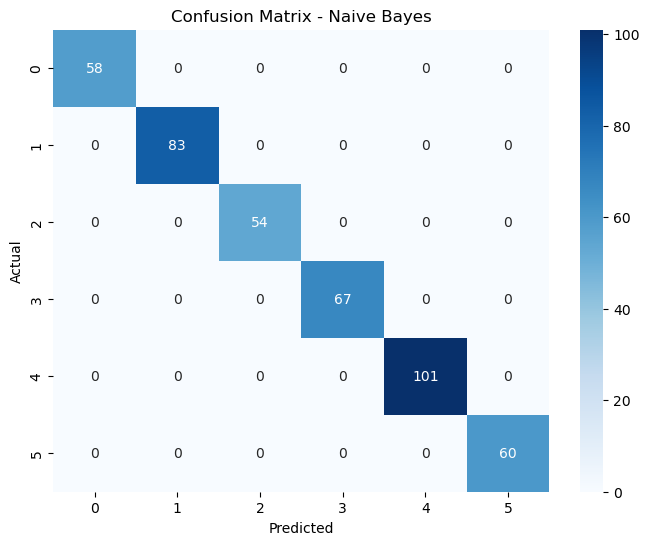

In [45]:
cm_nb = confusion_matrix(y_test, y_pred_naiveB)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', xticklabels=NB_model.classes_, yticklabels=NB_model.classes_)
plt.title('Confusion Matrix - Naive Bayes')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### KNN

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
# training the model -knn
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

D:\anaconda\Lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [48]:
y_pred_knn = knn_model.predict(x_test)

In [49]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.9929078014184397

In [50]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       0.98      0.99      0.98        83
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        67
           4       1.00      1.00      1.00       101
           5       0.98      0.97      0.97        60

    accuracy                           0.99       423
   macro avg       0.99      0.99      0.99       423
weighted avg       0.99      0.99      0.99       423



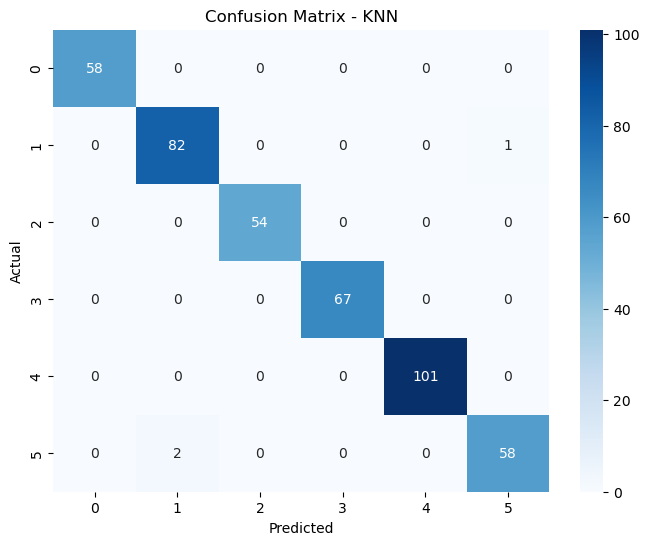

In [51]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=knn_model.classes_, yticklabels=knn_model.classes_)
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### K-Means

In [52]:
from sklearn.cluster import KMeans

In [53]:
#KMeans
# use feature scalling of PCA -X_scaled for KMeans
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

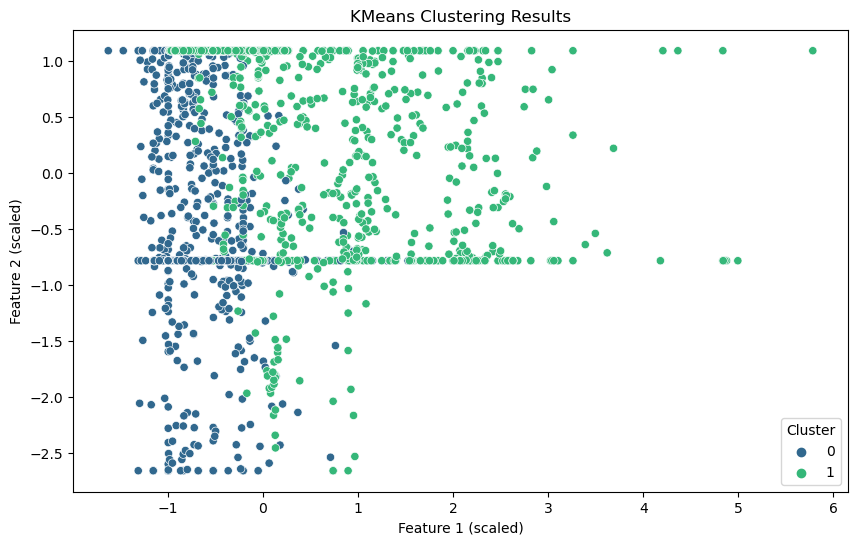

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df['cluster'], palette='viridis')
plt.title('KMeans Clustering Results')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend(title='Cluster')
plt.show()

In [57]:
import joblib
joblib.dump(RF_model, "diabetes_model.pkl")

['diabetes_model.pkl']